# Gestão de Energia ML

This notebook will test some ML algorithms using the cleaned BANES energy dataset.

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# tensorflow libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, Input
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# import sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler


In [2]:
df = pd.read_csv('BANES_Energy_Data_Electricity_cleaned.csv')
df.head()


,date,location,postcode,totalunits,_00_30,_01_00,_01_30,_02_00,_02_30,_03_00,...,_20_30,_21_00,_21_30,_22_00,_22_30,_23_00,_23_30,_24_00,mpan,msid
0,2017-11-14T00:00:00+00:00,Infants School - Main School 2,BA2 1LG,125.602,0.452,0.485,0.443,0.464,0.437,0.470,...,0.531,0.548,0.541,0.480,0.572,0.477,0.540,0.509,2.200013e+12,E12BG00542
1,2016-07-24T00:00:00+00:00,Infants School - Hot Water,BA2 1LG,0.002,0.000,0.000,0.000,0.001,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.200013e+12,E12BG05597
2,2017-02-05T00:00:00+00:00,Infants School - Kitchen,BA2 1LG,15.080,0.343,0.270,0.202,0.199,0.171,0.351,...,0.339,0.282,0.333,0.362,0.317,0.293,0.320,0.279,2.200013e+12,E12BG05598
3,2016-04-24T00:00:00+00:00,Infants School - Main School 2,BA2 1LG,26.122,0.448,0.476,0.469,0.417,0.457,0.471,...,0.503,0.458,0.463,0.518,0.531,0.436,0.458,0.519,2.200013e+12,E12BG00542
4,2013-04-29T00:00:00+00:00,Infants School - Main School 2,BA2 1LG,130.252,0.885,0.723,0.841,0.959,0.767,0.806,...,1.167,1.053,0.979,1.003,0.960,0.954,0.997,1.015,2.200013e+12,E12BG00542


## LSTM

In [3]:
df.head()


,date,location,postcode,totalunits,_00_30,_01_00,_01_30,_02_00,_02_30,_03_00,...,_20_30,_21_00,_21_30,_22_00,_22_30,_23_00,_23_30,_24_00,mpan,msid
0,2017-11-14T00:00:00+00:00,Infants School - Main School 2,BA2 1LG,125.602,0.452,0.485,0.443,0.464,0.437,0.470,...,0.531,0.548,0.541,0.480,0.572,0.477,0.540,0.509,2.200013e+12,E12BG00542
1,2016-07-24T00:00:00+00:00,Infants School - Hot Water,BA2 1LG,0.002,0.000,0.000,0.000,0.001,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.200013e+12,E12BG05597
2,2017-02-05T00:00:00+00:00,Infants School - Kitchen,BA2 1LG,15.080,0.343,0.270,0.202,0.199,0.171,0.351,...,0.339,0.282,0.333,0.362,0.317,0.293,0.320,0.279,2.200013e+12,E12BG05598
3,2016-04-24T00:00:00+00:00,Infants School - Main School 2,BA2 1LG,26.122,0.448,0.476,0.469,0.417,0.457,0.471,...,0.503,0.458,0.463,0.518,0.531,0.436,0.458,0.519,2.200013e+12,E12BG00542
4,2013-04-29T00:00:00+00:00,Infants School - Main School 2,BA2 1LG,130.252,0.885,0.723,0.841,0.959,0.767,0.806,...,1.167,1.053,0.979,1.003,0.960,0.954,0.997,1.015,2.200013e+12,E12BG00542


In [4]:
daily_df = df.groupby(['date']).mean()
daily_df.head()


,totalunits,_00_30,_01_00,_01_30,_02_00,_02_30,_03_00,_03_30,_04_00,_04_30,...,_20_00,_20_30,_21_00,_21_30,_22_00,_22_30,_23_00,_23_30,_24_00,mpan
date,,,,,,,,,,,,,,,,,,,,,
2006-10-01T00:00:00+00:00,1089.49995,19.35,19.55,19.30,19.00,18.6,17.80,17.55,17.95,17.75,...,18.65,18.45,18.75,18.50,18.95,18.80,19.05,18.75,18.60,2.200030e+12
2006-10-02T00:00:00+00:00,1697.65000,18.25,18.50,18.30,18.50,18.5,18.55,18.80,18.50,32.00,...,20.90,21.10,20.30,20.75,20.50,20.40,20.70,20.05,19.15,2.200030e+12
2006-10-03T00:00:00+00:00,1801.45000,19.25,19.20,19.25,19.30,19.1,19.35,18.95,21.25,27.90,...,31.80,29.85,24.35,22.35,22.25,20.45,19.55,18.95,18.00,2.200030e+12
2006-10-04T00:00:00+00:00,1684.15000,18.15,18.00,17.90,17.95,18.1,17.95,18.15,17.60,22.45,...,20.65,20.00,19.60,19.45,19.85,19.95,19.60,18.55,18.25,2.200030e+12
2006-10-05T00:00:00+00:00,1777.25000,18.55,17.70,17.90,17.90,18.1,18.15,18.10,17.95,25.80,...,22.30,21.45,20.95,20.95,21.15,20.10,19.25,18.05,17.95,2.200030e+12


In [5]:
daily_df.drop(columns=['totalunits', 'mpan'], inplace=True)
daily_df.head()


,_00_30,_01_00,_01_30,_02_00,_02_30,_03_00,_03_30,_04_00,_04_30,_05_00,...,_19_30,_20_00,_20_30,_21_00,_21_30,_22_00,_22_30,_23_00,_23_30,_24_00
date,,,,,,,,,,,,,,,,,,,,,
2006-10-01T00:00:00+00:00,19.35,19.55,19.30,19.00,18.6,17.80,17.55,17.95,17.75,18.15,...,18.65,18.65,18.45,18.75,18.50,18.95,18.80,19.05,18.75,18.60
2006-10-02T00:00:00+00:00,18.25,18.50,18.30,18.50,18.5,18.55,18.80,18.50,32.00,33.55,...,21.40,20.90,21.10,20.30,20.75,20.50,20.40,20.70,20.05,19.15
2006-10-03T00:00:00+00:00,19.25,19.20,19.25,19.30,19.1,19.35,18.95,21.25,27.90,27.90,...,31.00,31.80,29.85,24.35,22.35,22.25,20.45,19.55,18.95,18.00
2006-10-04T00:00:00+00:00,18.15,18.00,17.90,17.95,18.1,17.95,18.15,17.60,22.45,23.65,...,20.65,20.65,20.00,19.60,19.45,19.85,19.95,19.60,18.55,18.25
2006-10-05T00:00:00+00:00,18.55,17.70,17.90,17.90,18.1,18.15,18.10,17.95,25.80,28.25,...,22.55,22.30,21.45,20.95,20.95,21.15,20.10,19.25,18.05,17.95


In [6]:
daily_df.loc[:, 'energy'] = daily_df.sum(axis=1)
daily_df.head()


,_00_30,_01_00,_01_30,_02_00,_02_30,_03_00,_03_30,_04_00,_04_30,_05_00,...,_20_00,_20_30,_21_00,_21_30,_22_00,_22_30,_23_00,_23_30,_24_00,energy
date,,,,,,,,,,,,,,,,,,,,,
2006-10-01T00:00:00+00:00,19.35,19.55,19.30,19.00,18.6,17.80,17.55,17.95,17.75,18.15,...,18.65,18.45,18.75,18.50,18.95,18.80,19.05,18.75,18.60,1089.50
2006-10-02T00:00:00+00:00,18.25,18.50,18.30,18.50,18.5,18.55,18.80,18.50,32.00,33.55,...,20.90,21.10,20.30,20.75,20.50,20.40,20.70,20.05,19.15,1697.65
2006-10-03T00:00:00+00:00,19.25,19.20,19.25,19.30,19.1,19.35,18.95,21.25,27.90,27.90,...,31.80,29.85,24.35,22.35,22.25,20.45,19.55,18.95,18.00,1801.45
2006-10-04T00:00:00+00:00,18.15,18.00,17.90,17.95,18.1,17.95,18.15,17.60,22.45,23.65,...,20.65,20.00,19.60,19.45,19.85,19.95,19.60,18.55,18.25,1684.15
2006-10-05T00:00:00+00:00,18.55,17.70,17.90,17.90,18.1,18.15,18.10,17.95,25.80,28.25,...,22.30,21.45,20.95,20.95,21.15,20.10,19.25,18.05,17.95,1777.25


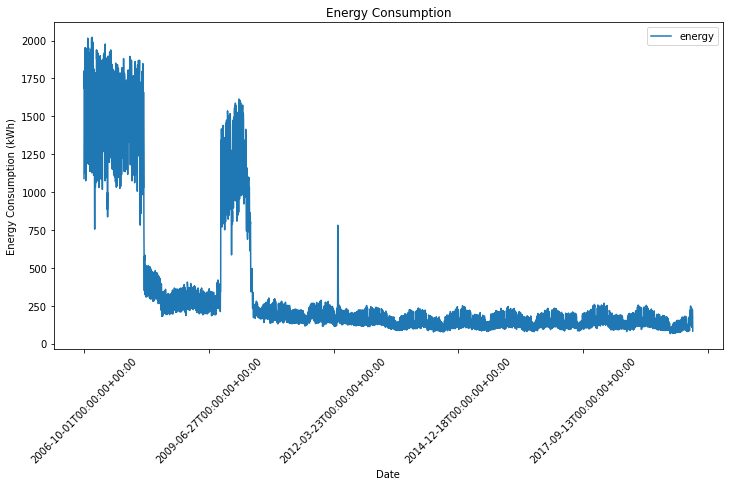

In [7]:
daily_df.plot(y='energy', figsize=(12, 6))
plt.title('Energy Consumption')
plt.xlabel('Date')
plt.ylabel('Energy Consumption (kWh)')
plt.xticks(rotation=45)
plt.show()


Valores estranhamente elevados no início do dataset.

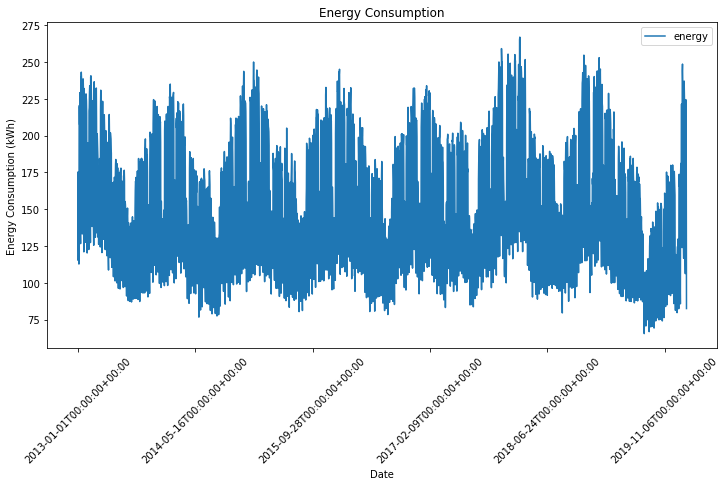

In [8]:
daily_df[daily_df.index > '2013-01-01'].plot(y='energy', figsize=(12, 6))
plt.title('Energy Consumption')
plt.xlabel('Date')
plt.ylabel('Energy Consumption (kWh)')
plt.xticks(rotation=45)
plt.show()


In [9]:
daily_df = daily_df[daily_df.index > '2013-01-01']
daily_df = daily_df[['energy']]
daily_df.head()


,energy
date,
2013-01-01T00:00:00+00:00,115.472574
2013-01-02T00:00:00+00:00,170.468957
2013-01-03T00:00:00+00:00,175.375739
2013-01-04T00:00:00+00:00,166.999681
2013-01-05T00:00:00+00:00,123.082174


In [10]:
# scale the data with MinMaxScaler
scaler = MinMaxScaler()
daily_df = daily_df.values
daily_df = scaler.fit_transform(daily_df)
daily_df = pd.DataFrame(daily_df, columns=['energy'])
daily_df.head()


,energy
0,0.248490
1,0.521435
2,0.545787
3,0.504217
4,0.286257


In [11]:
def split_sequence(sequence, n_steps):
    """
    Split a time series sequence into samples
    """
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence) - 1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)


In [12]:
# split the sequence into 5 steps
X, y = split_sequence(daily_df['energy'], 5)

for i in range(5):
    print(X[i], y[i])


[0.24849047 0.52143517 0.54578733 0.50421731 0.28625659] 0.23469589027637727
[0.52143517 0.54578733 0.50421731 0.28625659 0.23469589] 0.7629201691937688
[0.54578733 0.50421731 0.28625659 0.23469589 0.76292017] 0.7697910601342395
[0.50421731 0.28625659 0.23469589 0.76292017 0.76979106] 0.7048519370087398
[0.28625659 0.23469589 0.76292017 0.76979106 0.70485194] 0.8127868869078541


In [13]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))


In [14]:
# split train and test data
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
trainX, testX = X[:train_size], X[train_size:]
trainy, testy = y[:train_size], y[train_size:]


In [15]:
# import LSTM
from keras.layers import LSTM, Bidirectional


def create_lstm_model(df):
    """
    Build an LSTM model
    """
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True,
                   input_shape=(df.shape[1], 1)))
    model.add(LSTM(units=50, return_sequences=True))
    model.add(LSTM(units=50))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer='adam', metrics=['mse'])
    return model


def create_blstm_model(df):
    """
    Build an BLSTM model
    """
    model = Sequential()
    model.add(Bidirectional(LSTM(units=50, return_sequences=True),
                            input_shape=(df.shape[1], 1)))
    model.add(Bidirectional(LSTM(units=50, return_sequences=True)))
    model.add(Bidirectional(LSTM(units=50)))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer='adam', metrics=['mse'])
    return model


In [16]:
lstm_model = create_lstm_model(trainX)


In [17]:
lstm_model.fit(trainX, trainy, epochs=100, batch_size=10)


Epoch 1/100
208/208 [==============================] - 7s 8ms/step - loss: 0.0586 - mse: 0.0586
Epoch 2/100
208/208 [==============================] - 2s 9ms/step - loss: 0.0509 - mse: 0.0509
Epoch 3/100
208/208 [==============================] - 2s 10ms/step - loss: 0.0483 - mse: 0.0483
Epoch 4/100
208/208 [==============================] - 2s 9ms/step - loss: 0.0343 - mse: 0.0343
Epoch 5/100
208/208 [==============================] - 2s 9ms/step - loss: 0.0171 - mse: 0.0171
Epoch 6/100
208/208 [==============================] - 2s 9ms/step - loss: 0.0109 - mse: 0.0109
Epoch 7/100
208/208 [==============================] - 2s 9ms/step - loss: 0.0098 - mse: 0.0098
Epoch 8/100
208/208 [==============================] - 2s 9ms/step - loss: 0.0091 - mse: 0.0091
Epoch 9/100
208/208 [==============================] - 2s 9ms/step - loss: 0.0082 - mse: 0.0082
Epoch 10/100
208/208 [==============================] - 2s 9ms/step - loss: 0.0080 - mse: 0.0080
Epoch 11/100
208/208 [================

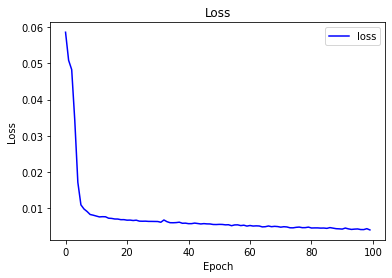

In [18]:
# plot loss
plt.plot(lstm_model.history.history['loss'], c="b")
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['loss'])
plt.show()


In [19]:
# make predictions
predictions = lstm_model.predict(testX.reshape(testX.shape[0], testX.shape[1], 1))
predictions = scaler.inverse_transform(predictions)


In [20]:
# scale back testy
testy = testy.reshape(testy.shape[0], 1)
testy = scaler.inverse_transform(testy)

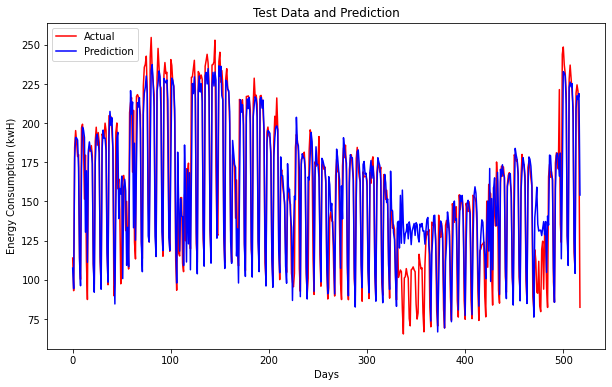

In [21]:
# plot the predictions and test data
plt.figure(figsize=(10, 6))
plt.plot(testy, 'r', label='Actual')
plt.plot(predictions, 'b', label='Prediction')
plt.title('Test Data and Prediction')
plt.xlabel('Days')
plt.ylabel('Energy Consumption (kwH)')
plt.legend()
plt.show()


In [22]:
# performance metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

print('Mean Squared Error:', np.round(mean_squared_error(testy, predictions), 2))
print('Root Mean Squared Error:', np.round(np.sqrt(mean_squared_error(testy, predictions)), 2))
print('Mean Absolute Error:', np.round(mean_absolute_error(testy, predictions), 2))
print('Mean Absolute Percentage Error:', np.round(mean_absolute_error(testy, predictions)/testy.mean(), 2))
print('R2 Score:', np.round(r2_score(testy, predictions), 2))


Mean Squared Error: 467.34
Root Mean Squared Error: 21.62
Mean Absolute Error: 13.83
Mean Absolute Percentage Error: 0.09
R2 Score: 0.79


In [23]:
# plot the predictions for the entire dataset
predictions = lstm_model.predict(X.reshape(X.shape[0], X.shape[1], 1))
predictions = scaler.inverse_transform(predictions)


In [24]:
# scale back daily_df
daily_df = daily_df.values
daily_df = scaler.inverse_transform(daily_df)

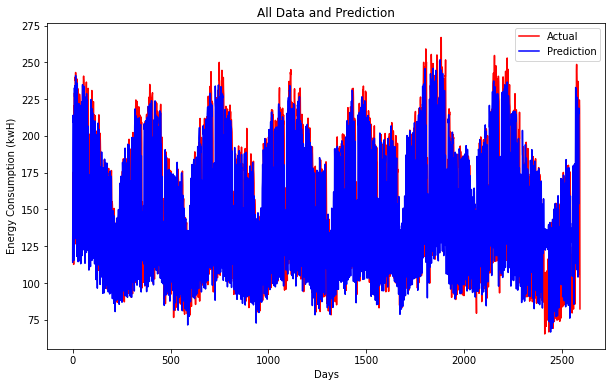

In [25]:
# plot the predictions and entire dataset
plt.figure(figsize=(10, 6))
plt.plot(daily_df, 'r', label='Actual')
plt.plot(predictions, 'b', label='Prediction')
plt.title('All Data and Prediction')
plt.xlabel('Days')
plt.ylabel('Energy Consumption (kwH)')
plt.legend()
plt.show()


## Bi-LSTM

In [26]:
blstm_model = create_blstm_model(trainX)

In [27]:
blstm_model.fit(trainX, trainy, epochs=100, batch_size=10)

Epoch 1/100
208/208 [==============================] - 15s 13ms/step - loss: 0.0534 - mse: 0.0534
Epoch 2/100
208/208 [==============================] - 3s 13ms/step - loss: 0.0442 - mse: 0.0442
Epoch 3/100
208/208 [==============================] - 3s 12ms/step - loss: 0.0334 - mse: 0.0334
Epoch 4/100
208/208 [==============================] - 2s 12ms/step - loss: 0.0170 - mse: 0.0170
Epoch 5/100
208/208 [==============================] - 2s 12ms/step - loss: 0.0154 - mse: 0.0154
Epoch 6/100
208/208 [==============================] - 3s 12ms/step - loss: 0.0128 - mse: 0.0128
Epoch 7/100
208/208 [==============================] - 3s 12ms/step - loss: 0.0114 - mse: 0.0114
Epoch 8/100
208/208 [==============================] - 3s 12ms/step - loss: 0.0111 - mse: 0.0111
Epoch 9/100
208/208 [==============================] - 3s 13ms/step - loss: 0.0104 - mse: 0.0104
Epoch 10/100
208/208 [==============================] - 3s 12ms/step - loss: 0.0100 - mse: 0.0100
Epoch 11/100
208/208 [======

In [28]:
predictions = blstm_model.predict(testX.reshape(testX.shape[0], testX.shape[1], 1))
predictions = scaler.inverse_transform(predictions)

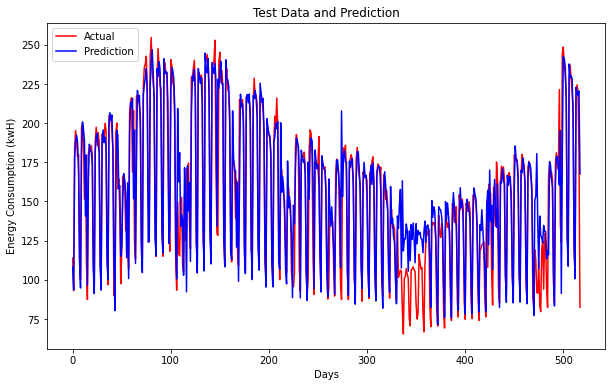

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(testy, 'r', label='Actual')
plt.plot(predictions, 'b', label='Prediction')
plt.title('Test Data and Prediction')
plt.xlabel('Days')
plt.ylabel('Energy Consumption (kwH)')
plt.legend()
plt.show()


In [30]:
# performance metrics
print('Mean Squared Error:', np.round(mean_squared_error(testy, predictions), 2))
print('Root Mean Squared Error:', np.round(np.sqrt(mean_squared_error(testy, predictions)), 2))
print('Mean Absolute Error:', np.round(mean_absolute_error(testy, predictions), 2))
print('Mean Absolute Percentage Error:', np.round(mean_absolute_error(testy, predictions)/testy.mean(), 2))
print('R2 Score:', np.round(r2_score(testy, predictions), 2))


Mean Squared Error: 446.52
Root Mean Squared Error: 21.13
Mean Absolute Error: 12.88
Mean Absolute Percentage Error: 0.08
R2 Score: 0.8


In [31]:
# predict for the entire dataset
predictions = blstm_model.predict(X.reshape(X.shape[0], X.shape[1], 1))
predictions = scaler.inverse_transform(predictions)

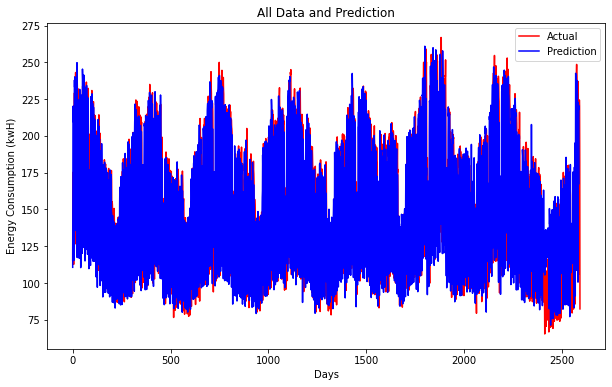

In [32]:
# plot the predictions and entire dataset
plt.figure(figsize=(10, 6))
plt.plot(daily_df, 'r', label='Actual')
plt.plot(predictions, 'b', label='Prediction')
plt.title('All Data and Prediction')
plt.xlabel('Days')
plt.ylabel('Energy Consumption (kwH)')
plt.legend()
plt.show()


## ANN

In [33]:
df.head()

,date,location,postcode,totalunits,_00_30,_01_00,_01_30,_02_00,_02_30,_03_00,...,_20_30,_21_00,_21_30,_22_00,_22_30,_23_00,_23_30,_24_00,mpan,msid
0,2017-11-14T00:00:00+00:00,Infants School - Main School 2,BA2 1LG,125.602,0.452,0.485,0.443,0.464,0.437,0.470,...,0.531,0.548,0.541,0.480,0.572,0.477,0.540,0.509,2.200013e+12,E12BG00542
1,2016-07-24T00:00:00+00:00,Infants School - Hot Water,BA2 1LG,0.002,0.000,0.000,0.000,0.001,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.200013e+12,E12BG05597
2,2017-02-05T00:00:00+00:00,Infants School - Kitchen,BA2 1LG,15.080,0.343,0.270,0.202,0.199,0.171,0.351,...,0.339,0.282,0.333,0.362,0.317,0.293,0.320,0.279,2.200013e+12,E12BG05598
3,2016-04-24T00:00:00+00:00,Infants School - Main School 2,BA2 1LG,26.122,0.448,0.476,0.469,0.417,0.457,0.471,...,0.503,0.458,0.463,0.518,0.531,0.436,0.458,0.519,2.200013e+12,E12BG00542
4,2013-04-29T00:00:00+00:00,Infants School - Main School 2,BA2 1LG,130.252,0.885,0.723,0.841,0.959,0.767,0.806,...,1.167,1.053,0.979,1.003,0.960,0.954,0.997,1.015,2.200013e+12,E12BG00542


In [34]:
df.describe()

,totalunits,_00_30,_01_00,_01_30,_02_00,_02_30,_03_00,_03_30,_04_00,_04_30,...,_20_00,_20_30,_21_00,_21_30,_22_00,_22_30,_23_00,_23_30,_24_00,mpan
count,1.662560e+05,166256.000000,166256.000000,166256.000000,166256.000000,166256.000000,166256.000000,166256.000000,166256.000000,166256.000000,...,166256.000000,166256.000000,166256.000000,166256.000000,166256.000000,166256.000000,166256.000000,166256.000000,166256.000000,1.637260e+05
mean,1.913724e+02,2.542144,2.645238,2.804486,2.803095,2.795158,2.778662,2.868324,2.871365,2.916188,...,2.881710,2.795654,2.715944,2.549549,2.494906,2.490414,2.474577,2.507039,2.526720,2.195721e+12
std,3.648770e+02,5.464266,5.529904,5.616386,5.609755,5.596517,5.566800,5.610439,5.613151,5.733429,...,6.321034,6.133267,5.946506,5.745037,5.612558,5.615580,5.531066,5.547495,5.514091,2.900222e+10
min,1.000000e-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000006e+12
25%,1.524175e+01,0.176000,0.177000,0.185000,0.186000,0.186000,0.185000,0.199000,0.197000,0.194000,...,0.200000,0.200000,0.208000,0.199219,0.196000,0.193000,0.191000,0.192000,0.181000,2.200012e+12
50%,5.131000e+01,0.526000,0.536000,0.565000,0.564000,0.564000,0.561000,0.590000,0.590000,0.586000,...,0.539000,0.538000,0.539000,0.520000,0.519000,0.517000,0.518000,0.521000,0.523000,2.200013e+12
75%,1.693308e+02,1.771000,1.860000,2.036000,2.042000,2.025250,2.029000,2.197000,2.200000,2.200000,...,1.863000,1.800000,1.778000,1.638000,1.642000,1.637000,1.654000,1.661000,1.701000,2.200030e+12
max,2.372300e+03,43.500000,46.500000,45.000000,42.600000,42.100000,42.300000,42.500000,40.300000,43.300000,...,52.100000,49.900000,48.400000,48.000000,47.300000,47.000000,47.500000,44.800000,45.000000,2.200043e+12


In [35]:
grouped_df = df.copy()

grouped_df.loc[:, 'date'] = pd.to_datetime(grouped_df.loc[:, 'date'])
grouped_df.loc[:, 'energy'] = grouped_df.iloc[:, 4:-2].sum(axis=1)

grouped_df = grouped_df[['date', 'energy']]

grouped_df = grouped_df.groupby('date').mean().reset_index()

grouped_df.head(10)

,date,energy
0,2006-10-01 00:00:00+00:00,1089.50
1,2006-10-02 00:00:00+00:00,1697.65
2,2006-10-03 00:00:00+00:00,1801.45
3,2006-10-04 00:00:00+00:00,1684.15
4,2006-10-05 00:00:00+00:00,1777.25
5,2006-10-06 00:00:00+00:00,1764.80
6,2006-10-07 00:00:00+00:00,1491.60
7,2006-10-08 00:00:00+00:00,1123.85
8,2006-10-09 00:00:00+00:00,1824.30
9,2006-10-10 00:00:00+00:00,1953.55


In [36]:
def split_ann_sequences(df: pd.DataFrame, days: list):
    """
    Split into X and y
    """
    X, y = [], []
    for d in days:
        r = []
        for i in range(1, 6):
            # look back 5 years
            r.append(df[df['date'] == d - pd.Timedelta(days=i * 365)].energy.values[0])
        X.append(r)
        y.append(df[df['date'] == d].energy.values[0])
    return np.array(X), np.array(y)


In [37]:
days = grouped_df['date'].sort_values().unique()[-365:]

X, y = split_ann_sequences(grouped_df, days)

for i in range(5):
    print(X[i], y[i])

[250.97568085 217.76367347 232.01393478 231.49341176 106.71087234] 224.5071590909091
[237.34278723 229.05908163 222.96615217 239.73398039 218.941     ] 127.54253488372092
[151.00193478 211.23438776 221.1451087  231.5357451  227.01114894] 110.81299999999997
[127.31235556 131.07140816 208.56506522 228.44521569 228.13087234] 228.34000000000003
[203.61437778 116.77012245 128.01231111 207.89413725 229.31617021] 234.7618181818182


In [38]:
def build_model(input_shape):
    """
    Build an ANN
    """
    model = Sequential()
    model.add(Input(input_shape))
    model.add(Dense(15))
    model.add(Activation('relu'))
    model.add(Dense(5))
    model.add(Activation('relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model


In [39]:
# split into train and test
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
trainX, testX = X[:train_size], X[train_size:]
trainy, testy = y[:train_size], y[train_size:]

In [40]:
ann_model = build_model(input_shape=(5,))

In [41]:
ann_model.fit(trainX, trainy, epochs=200, batch_size=10)

Epoch 1/200
30/30 [==============================] - 0s 1ms/step - loss: 2116.1121
Epoch 2/200
30/30 [==============================] - 0s 1ms/step - loss: 1881.1211
Epoch 3/200
30/30 [==============================] - 0s 2ms/step - loss: 1722.8260
Epoch 4/200
30/30 [==============================] - 0s 1ms/step - loss: 1608.7390
Epoch 5/200
30/30 [==============================] - 0s 1ms/step - loss: 1538.8385
Epoch 6/200
30/30 [==============================] - 0s 1ms/step - loss: 1496.0509
Epoch 7/200
30/30 [==============================] - 0s 1ms/step - loss: 1438.5039
Epoch 8/200
30/30 [==============================] - 0s 1ms/step - loss: 1388.6232
Epoch 9/200
30/30 [==============================] - 0s 1ms/step - loss: 1339.1967
Epoch 10/200
30/30 [==============================] - 0s 1ms/step - loss: 1312.3218
Epoch 11/200
30/30 [==============================] - 0s 2ms/step - loss: 1287.0863
Epoch 12/200
30/30 [==============================] - 0s 2ms/step - loss: 1259.8644
E

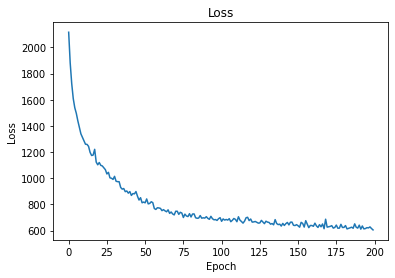

In [42]:
# plot the loss
plt.plot(ann_model.history.history['loss'])
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


In [43]:
# make predictions
predictions = ann_model.predict(testX)


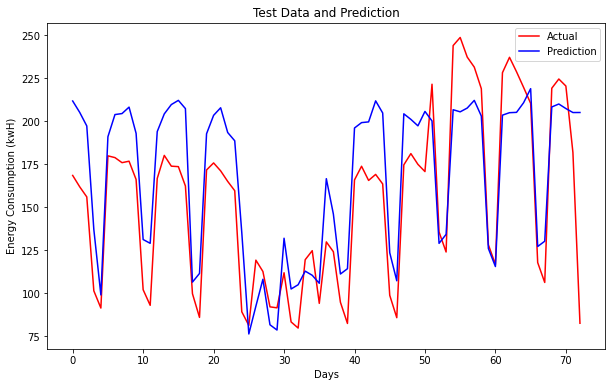

In [44]:
# plot the predictions and actual values
plt.figure(figsize=(10, 6))
plt.plot(testy, 'r', label='Actual')
plt.plot(predictions, 'b', label='Prediction')
plt.title('Test Data and Prediction')
plt.xlabel('Days')
plt.ylabel('Energy Consumption (kwH)')
plt.legend()
plt.show()


In [45]:
# performance metrics
print('Mean Squared Error:', np.round(mean_squared_error(testy, predictions), 2))
print('Root Mean Squared Error:', np.round(np.sqrt(mean_squared_error(testy, predictions)), 2))
print('Mean Absolute Error:', np.round(mean_absolute_error(testy, predictions), 2))
print('Mean Absolute Percentage Error:', np.round(mean_absolute_error(testy, predictions)/testy.mean(), 2))
print('R2 Score:', np.round(r2_score(testy, predictions), 2))


Mean Squared Error: 904.56
Root Mean Squared Error: 30.08
Mean Absolute Error: 25.26
Mean Absolute Percentage Error: 0.17
R2 Score: 0.62
